In [1]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 35.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.0 MB/s eta 0:00:00
Mounted at /content/gdrive


In [2]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [3]:
key = os.environ.get('AZURE_SEARCH_KEY', '9a5e308d1e004e85a82cf6ead7c18bb9')

In [4]:
results = search_images_bing(key, 'melody')
ims = results.attrgot('contentUrl')
len(ims)

150

In [5]:
dest = 'images/melody.jpg'
download_url(ims[0], dest)

Path('images/melody.jpg')

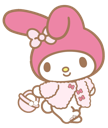

In [6]:
im = Image.open(dest)
im.to_thumb(128,128)

In [7]:
cartoon_types = 'melody','kuromi','pompom purin'
path = Path('cartoon')

In [8]:
if not path.exists():
    path.mkdir()
    for o in cartoon_types:
        dest = (path/o)
        if not dest.exists() or len(os.listdir(dest)) == 0:
         dest.mkdir(exist_ok=True)
         results = search_images_bing(key, f'{o} cartoon')
         download_images(dest, urls=results.attrgot('contentUrl'))

In [10]:
fns = get_image_files(path)
fns

(#426) [Path('cartoon/melody/073b7307-ceb3-46c7-a9ea-6f5d9dcc92dd.jpg'),Path('cartoon/melody/cbe6543c-5d98-4d07-88af-141a29b38492.jpg'),Path('cartoon/melody/dc9a7df3-9ec3-412b-b4f6-150750c01756.jpg'),Path('cartoon/melody/2af11941-5597-4c5d-95bb-ad79043b30bf.jpg'),Path('cartoon/melody/676ad432-b385-483c-b1f0-4afda850081d.jpg'),Path('cartoon/melody/d485efa1-74d1-4cba-ad67-66f8d4baccf7.jpg'),Path('cartoon/melody/e94b16bc-0052-4d2c-bddc-ee05dfd94eae.jpg'),Path('cartoon/melody/3ad7a93c-41ba-4be3-a223-6b79f514a107.png'),Path('cartoon/melody/7a535ad0-5878-497c-a4f8-2e85f43bbc76.jpg'),Path('cartoon/melody/af72a296-fb32-49f5-b79e-9636ba6ad8a7.jpg')...]

In [11]:
failed = verify_images(fns)
failed

(#8) [Path('cartoon/pompom purin/2124cfed-c906-4aa4-912a-a9acefac9984.gif'),Path('cartoon/pompom purin/bc2f9c5e-ee27-4e78-bd4f-b6e2bc4f073b.gif'),Path('cartoon/kuromi/4a9541bc-9ca1-48e2-a93e-6c9091f4bd36.jpg'),Path('cartoon/kuromi/16fdce82-2e27-474c-88ed-8409595ccc5b.gif'),Path('cartoon/kuromi/bc431e88-b85c-4e40-9000-b2aba116d6da.png'),Path('cartoon/kuromi/8fb88fc7-37d1-4ee1-864d-06bf9e591f3b.gif'),Path('cartoon/kuromi/174ca5d8-af38-4b0f-9cef-06bb81fbf8f8.gif'),Path('cartoon/kuromi/fb212619-292e-4daa-98ec-52e5283c1a49.jpg')]

In [12]:
failed.map(Path.unlink);

In [14]:
cartoon_characters = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [15]:
dls = cartoon_characters.dataloaders(path)

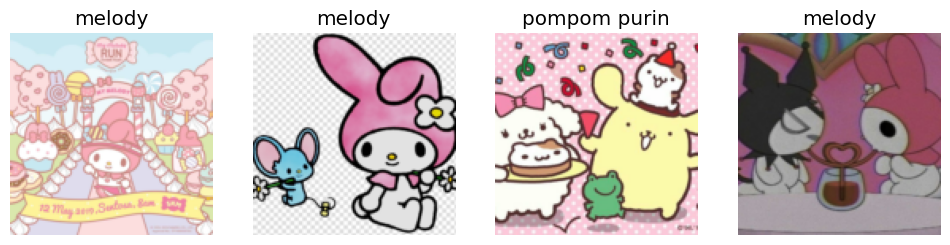

In [16]:
dls.valid.show_batch(max_n=4, nrows=1)

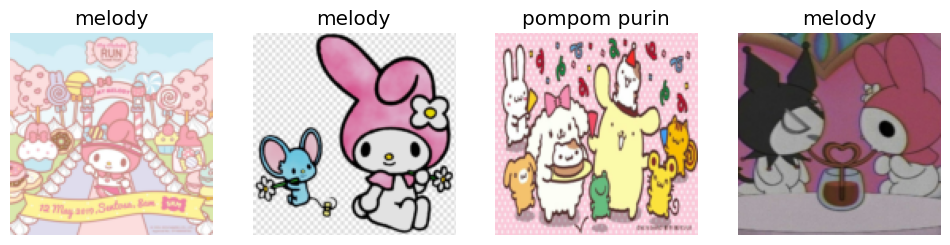

In [17]:
cartoon_characters = cartoon_characters.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = cartoon_characters.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

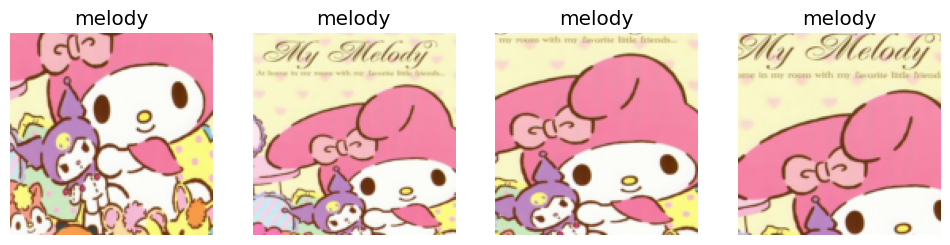

In [18]:
cartoon_characters = cartoon_characters.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = cartoon_characters.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

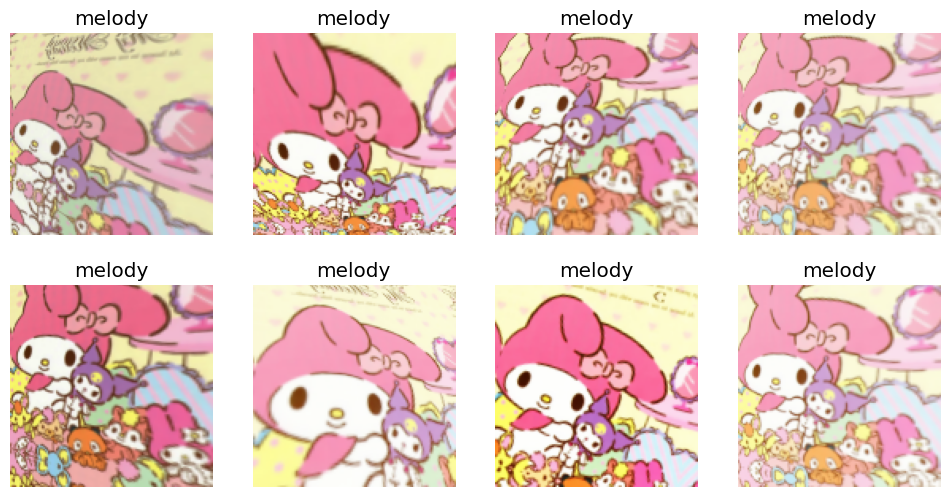

In [19]:
cartoon_characters = cartoon_characters.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = cartoon_characters.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [20]:
cartoon_characters = cartoon_characters.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = cartoon_characters.dataloaders(path)

In [21]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 196MB/s]


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes sh

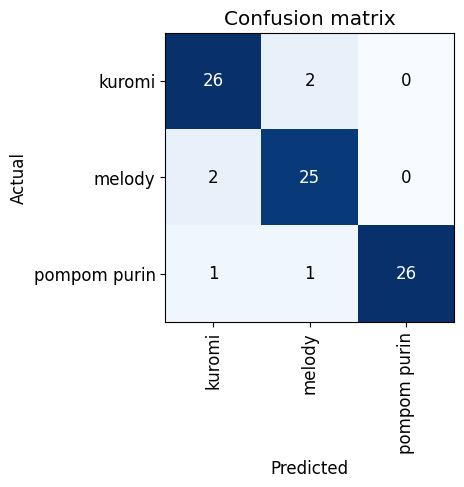

In [22]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

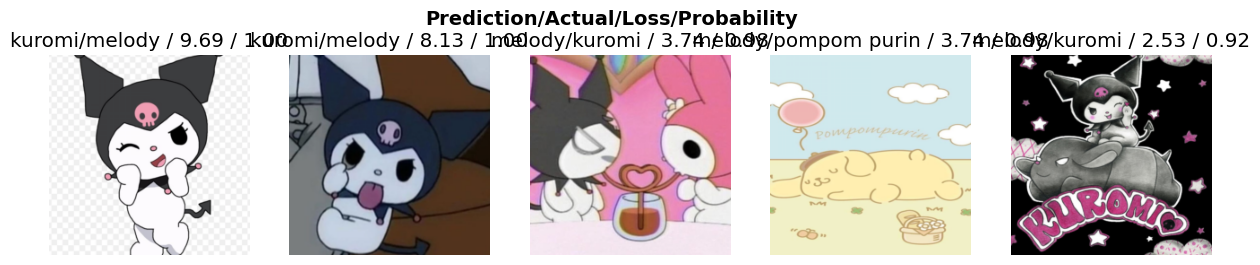

In [23]:
interp.plot_top_losses(5, nrows=1)

In [24]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [25]:
learn.export()

In [26]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [27]:
learn_inf = load_learner(path/'export.pkl')

In [44]:
learn_inf.predict('images/11111.jpg')

('melody', tensor(1), tensor([1.0927e-03, 9.9890e-01, 3.3874e-06]))

In [29]:
learn_inf.dls.vocab

['kuromi', 'melody', 'pompom purin']

In [33]:
#hide_output
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [45]:
btn_upload = SimpleNamespace(data = ['images/11111.jpg'])

In [47]:
img = PILImage.create(btn_upload.data[-1])

In [55]:
#hide_output
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [48]:
pred,pred_idx,probs = learn_inf.predict(img)

In [49]:
#hide_output
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: kuromi; Probability: 0.5713')

In [51]:
#hide_output
btn_run = widgets.Button(description='润')
btn_run

Button(description='润', style=ButtonStyle())

In [52]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [53]:
btn_upload = widgets.FileUpload()

In [56]:
VBox([widgets.Label('库洛米 黄金猎犬 美乐蒂分类器!'),
      btn_upload, btn_run, out_pl, lbl_pred])